## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from xgboost import XGBRegressor

## Dataset

In [ ]:
dataset = load_boston()

In [3]:
# Loading the dataset to a Pandas dataFrame
house_price_dataframe = pd.DataFrame(dataset.data, columns = dataset.feature_names)
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
house_price_dataframe['price'] = dataset.target
house_price_dataframe.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
# check for missing values
house_price_dataframe.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
price      0
dtype: int64

In [6]:
# statistical measures of the dataset
house_price_dataframe.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Correlation between features in the dataset 

<AxesSubplot: >

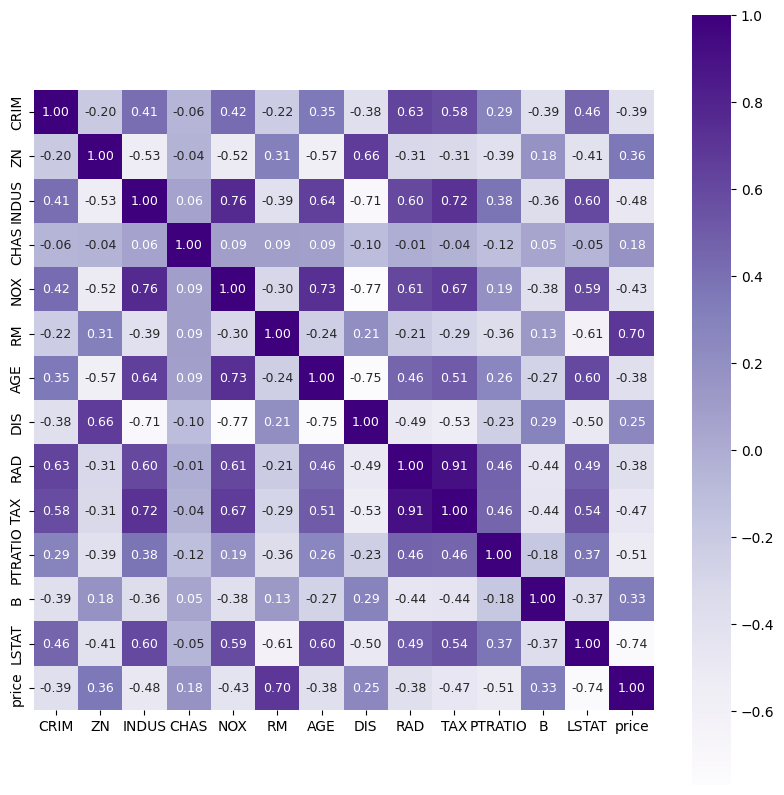

In [7]:
correlation = house_price_dataframe.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, cbar=True, square=True, fmt='.2f', annot=True, annot_kws={'size':9}, cmap='Purples')

### Splitting the data

In [8]:
x = house_price_dataframe.drop(['price'], axis=1)
y = house_price_dataframe['price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 2)

In [9]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled =scaler.fit_transform(x_test)

### Model training

In [ ]:
model = XGBRegressor(
    objective='reg:linear',
    booster='gbtree',
    n_estimators=100,
    n_jobs=1,
    learning_rate=0.1,
    max_depth=5,
    min_child_weight=1,
    subsample=1,
    colsample_bytree=1,
    colsample_bylevel=1,
    reg_alpha=0,
    reg_lambda=1,
    scale_pos_weight=1,
    gamma=0,
    max_delta_step=0,
    base_score=0.5,
    random_state=0
)
model.fit(x_train_scaled, y_train)

### Evaluation

In [11]:
training_data_prediction = model.predict(x_train_scaled)
print(training_data_prediction)

[21.736649  32.38507   15.853145  22.883032  19.993086  19.229668
 23.247852  37.43761   30.178377  33.111305  20.559317  49.606754
 13.966784   5.935666  17.321413   8.461484  27.901491  18.845789
 20.755852  45.623096  39.72568   33.569027  20.303093  33.33481
 24.70722   50.03034   13.401188  18.765476  19.580395  22.649166
 50.290306  23.292538  23.968801  22.461216  41.911034  16.771416
 32.589905  35.7788     7.1131415 20.180313  19.403734  12.324949
 25.127306  49.67089   38.130016  22.57521   41.047676  17.841736
 16.218552  28.454601  21.954681  20.08676   17.447697  18.522165
 19.55425   22.575514  19.982607  33.01318   15.036234  11.909049
 18.888538  20.848967  17.165022  20.469128  49.32074   17.109224
 16.666971  18.047155  14.5399    32.9279    14.299708  44.06473
 35.19084   19.796083  15.833323   8.014758  11.384389  12.492818
 18.506512   6.9024386 23.387495  12.093327  19.809086  49.94889
 22.16951   19.08444   31.145296  21.093128  32.201546  34.350582
 14.837791  1

In [12]:
# R-squared error
score1 = metrics.r2_score(y_train, training_data_prediction)

# Mean Absolute Error
score2 = metrics.mean_absolute_error(y_train, training_data_prediction)

print("R-squared error: ", score1)
print('Mean Absolute Error: ', score2)

R-squared error:  0.9957450732569616
Mean Absolute Error:  0.450424414435349


### Visualizing the actual and predicted prices

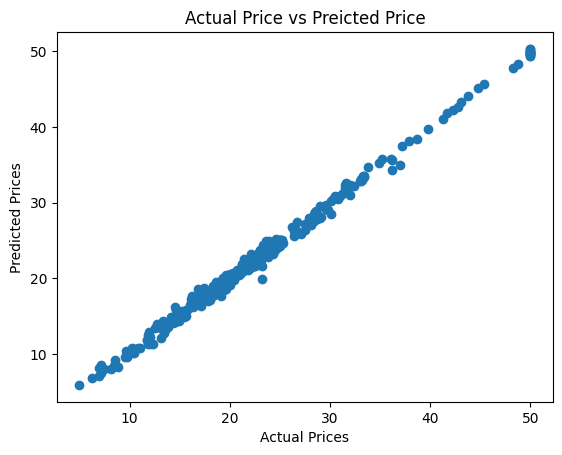

In [13]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual Price vs Preicted Price")
plt.show()

In [14]:
test_data_prediction = model.predict(x_test_scaled)

In [15]:
# R-squared error
score1 = metrics.r2_score(y_test, test_data_prediction)

# Mean Absolute Error
score2 = metrics.mean_absolute_error(y_test, test_data_prediction)

print("R squared error: ", score1)
print('Mean Absolute Error: ', score2)

R squared error:  0.9109480155140322
Mean Absolute Error:  1.981848162726352
